# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [136]:
import matplotlib
import pandas as pd

# Challenge 1

<font color='darkred'>
#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.</font>

In [97]:
temp = pd.read_csv('Temp_States.csv')

#### <font color='darkred'>Print `temp`</font>

In [98]:
display(temp)

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


In [99]:
# type(temp)

#### <font color='darkred'>Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.</font>

In [100]:
# PERSONAL TESTS:
# To return the type of of the col, nor the elem (all will obviously be series:)
# print(type(temp['City']),
# type(temp['State']),
# type(temp['Temperature']))

In [101]:
print(temp.dtypes)

City            object
State           object
Temperature    float64
dtype: object


City: string  
State: string  
Temperature: float

<font color='darkred'>#### Select the rows where state is New York

In [102]:
NYState = temp[temp.State == 'New York']
display(NYState)

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


<font color='darkred'>#### What is the average of the temperature of cities in New York?

In [103]:
AvNYState = NYState.mean()
AvNYState


Temperature    10.740741
dtype: float64

<font color='darkred'>#### We want to know cities and states with Temperature above 15 degress Celcius

Cities:

In [104]:
CitiesOver15 = temp.City[temp.Temperature > 15]
CitiesOver15

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

States: 

In [105]:
StatesOver15 = temp.State[temp.Temperature > 15]
StatesOver15

0       New York
3    Connecticut
5     New Jersey
6     New Jersey
Name: State, dtype: object

Pero queremos verlas juntas:

Para seleccionar varias columnas no se pued'e hacer con '[]' nor as an .attribute; usamos `.loc` o `.iloc`. Pero para selecciones condicionadas, realizamos primero la selección de filas dentro de [] e indicamos las columnas que queremos después con []. Ojo! Necesitamos una lista, con lo cual para seleccionar 2 cos o más tendremos que poner dos corchetes, para que sea **un** elmemento *lista*:

In [106]:
CityStatesOver15 = temp.loc[temp.Temperature > 15][['City','State']]
display(CityStatesOver15)

,City,State
0,NYC,New York
3,Hartford,Connecticut
5,Treton,New Jersey
6,Newark,New Jersey


<font color='darkred'>#### Now, return only the cities that have a temperature above 15 degress Celcius

In [107]:
temp[temp.Temperature > 15]['City']

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

<font color='darkred'>#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

<font color='darkred'>*Hint: First write the condition then select the rows.*

In [108]:
temp[(temp.Temperature > 15) & (temp.Temperature < 20)]['City']

0         NYC
3    Hartford
Name: City, dtype: object

<font color='darkred'>#### Find the mean and the standard deviation of the temperature of each state.

<font color='darkred'>*Hint: Use functions from Data Manipulation lesson*

In [109]:
temp.groupby('State').mean()

,Temperature
State,
Connecticut,15.833333
New Jersey,21.111111
New York,10.740741


In [110]:
temp.groupby('State').std()

,Temperature
State,
Connecticut,1.964186
New Jersey,1.571348
New York,8.133404


In [111]:
temp.groupby('State').agg({'Temperature':['mean', 'std']})

Temperature          
                   mean       std
State                            
Connecticut   15.833333  1.964186
New Jersey    21.111111  1.571348
New York      10.740741  8.133404

<font color='darkpink'>*.DO Put both results in a single df*

# Challenge 2

#### <font color='darkred'>Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [112]:
employee = pd.read_csv('employee.csv')

#### <font color='darkred'>Explore the data types of the employee dataframe. Comment your results

In [113]:
employee.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

All objects except Years and salary which are integers

#### <font color='darkred'>Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

In [138]:
%matplotlib inline

In [137]:
employee.hist()

ImportError: matplotlib is required for plotting.

It doesnt work with the instructions given in the 'learning'. Why? My installation was successful...!

<font color='darkred'>#### What's the average salary in this company?

In [119]:
employee.Salary.mean()

48.888888888888886

<font color='darkred'>#### What's the highest salary?

In [120]:
employee.Salary.max()

70

<font color='darkred'>#### What's the lowest salary?

In [121]:
employee.Salary.min()

30

<font color='darkred'>#### Who are the employees with the lowest salary?

In [122]:
employee[employee.Salary == employee.Salary.min()]['Name']

1    Maria
2    David
Name: Name, dtype: object

<font color='darkred'>#### Could you give all the information about an employee called David?

In [123]:
employee[employee.Name == 'David']

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


<font color='darkred'>#### Could you give only David's salary?

In [124]:
employee[employee.Name == 'David']['Salary']

2    30
Name: Salary, dtype: int64

<font color='darkred'>#### Print all the rows where job title is associate

In [125]:
employee[employee.Title == 'associate']

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


<font color='darkred'>#### Print the first 3 rows of your dataframe

<font color='darkred'>##### Tip : There are 2 ways to do it. Do it both ways

In [126]:
employee.iloc[0:3]


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [127]:
employee[0:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [128]:
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


<font color='darkred'>#### Find the employees who's title is associate and the salary above 55?

In [129]:
employee[(employee.Title == 'associate') & (employee.Salary > 55)]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


<font color='darkred'>#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [131]:
# employee.groupby('Years')
# type(test)
employee.groupby('Years').agg({'Salary':'mean'})

,Salary
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


<font color='darkred'>####  What is the average Salary per title?

In [132]:
employee.groupby('Title').agg({'Salary':'mean'})

,Salary
Title,
VP,70.000000
analyst,32.500000
associate,56.666667


<font color='darkred'>#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
    
<font color='darkred'>##### * Hint : Quantiles vs Quartiles*
    
<font color='darkred'>##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.` </font>

In [188]:
employee.boxplot()

NameError: name '_converter' is not defined

In [141]:
employee.quantile(0.25)

Years      2.0
Salary    35.0
Name: 0.25, dtype: float64

In [140]:
employee.quantile(0.75)



Years      7.0
Salary    60.0
Name: 0.75, dtype: float64

<font color='darkred'>
    #### Is the mean salary per gender different?

In [ ]:
employee.groupby('Gender').agg({'Salary':'mean'})

<font color='darkred'>#### Find the minimum, mean and the maximum of all numeric columns for each Department.

<font color='darkred'>##### Hint: Use functions from Data Manipulation lesson

In [142]:
salary_gender = employee.groupby('Gender', as_index=False).agg({'Salary': 'mean'})
salary_gender

,Gender,Salary
0,F,47.5
1,M,50.0


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [ ]:
SalDifference = (employee.groupby('Department').apply(lambda x: employee. employee.groupby'Department').min())

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [ ]:
orders = pd.read_csv('Orders.csv')

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [147]:
orders.dtypes

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

Porqué se pone paréntesis en describe() y no en dtypes?

In [145]:
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


####  What is the average Purchase Price?

In [148]:
orders.UnitPrice.mean()

3.1161744805540756

#### What were the highest and lowest purchase prices? 

In [149]:
orders.UnitPrice.max()

8142.75

In [150]:
orders.UnitPrice.min()

0.0

#### Select all the customers we have in Spain

In [156]:
orders.loc[orders['Country']=='Spain']['CustomerID'].head(5)

4250    12557
4251    12557
4252    12557
4253    12557
4254    12557
Name: CustomerID, dtype: int64

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [158]:
(orders['Country'] == 'Spain').value_counts()

False    395439
True       2485
Name: Country, dtype: int64

#### Select all the customers who have bought more than 50 items ?

In [160]:
# Group customers adding the quantities of their components:
ordersCustom = orders.groupby('CustomerID').agg({'Quantity':'sum'})
display(ordersCustom[ordersCustom > 50].head(5))

,Quantity
CustomerID,
12346,74215.0
12347,2458.0
12348,2341.0
12349,631.0
12350,197.0


#### Select orders from Spain that are above 50 items

In [164]:
orders[(orders['Country'] == 'Spain') & (orders['Quantity'] > 50)].head(5)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0


#### Select all free orders

In [168]:
orders[orders.UnitPrice == 0].head(5)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [185]:
# orders[orders.Description == '^lunch bag'].head(5)
# orders[orders.Description == 'lunch bag*'].head(5)
# orders[orders.Description == 'lunch bag\*'].head(5)
# orders[orders.Description == 'lunch bag[a-zA-Z]'].head(5)
orders[orders['Description'].str.contains('lunch bag')].head(5)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [186]:
orders[(orders['Description'].str.contains('lunch bag')) & (orders['year'] == 2011)].head(5)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65


#### Show the frequency distribution of the amount spent in Spain.

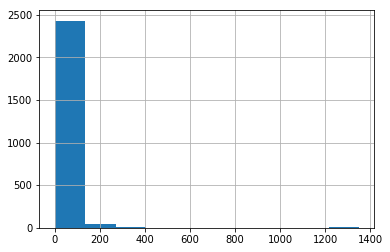

In [187]:
spenInSpain = orders[orders['Country'] == 'Spain']['amount_spent']
spenInSpain.hist()

#### Select all orders made in the month of August

In [190]:
orders[orders.month == 8].head(5)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [205]:
# orders.groupby('Country')['month' == 8]
# orders[orders['month'] == 8].head(5)
orders[orders['month'] == 8]['Country'].value_counts()

United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: Country, dtype: int64

#### What's the  average amount of money spent by country

In [197]:
orders.groupby('Country').agg({'amount_spent':'mean'}).head(5)

,amount_spent
Country,
Australia,116.895620
Austria,25.624824
Bahrain,32.258824
Belgium,20.283772
Brazil,35.737500


#### What's the most expensive item?

In [207]:
# orders.UnitPrice.max()['Description']

IndexError: invalid index to scalar variable.

#### What was the average amount spent per year ?

In [211]:
orders.groupby('year').agg({'amount_spent':'mean'})


,amount_spent
year,
2010,21.892733
2011,22.430074
